In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data.csv')

In [2]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

##Checking for any unwanted values

In [5]:
for col in df.columns:
  print(f"{col} unique values: {df[col].unique()}\n")

state unique values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account_length unique values: [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  1

In [6]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.sample()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
2585,NJ,96,510,368-6111,no,no,0,150.0,122,25.5,...,116,18.57,212.4,89,9.56,9.8,1,2.65,3,False


#Droping irrelevant Columns

####Since phone number has nothing to do with churn i will drop it

In [8]:
df.drop(columns=['phone_number'], inplace=True)

####Lets check the 3 area codes, if churn is higher for one or something else

In [9]:
df.groupby(['area_code'])['churn'].mean()

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64

####Clearly the churn for all the 3 areas are around the same (14-15%), so we can drop as there is similar churn in all three area codes

In [10]:
df.drop(columns=['area_code'], inplace=True)

####Now lets see correlation of Minutes, Calls and Charges

In [11]:
mcc = df.drop(columns=['state',	'account_length','international_plan'	,'voice_mail_plan'	,'number_vmail_messages',	'customer_service_calls','churn'])

In [12]:
mcc.corr()

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
total_day_minutes,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092
total_day_calls,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666
total_day_charge,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094
total_eve_minutes,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067
total_eve_calls,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674
total_eve_charge,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074
total_night_minutes,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180
total_night_calls,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630
total_night_charge,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186
total_intl_minutes,-0.010155,0.021565,-0.010157,-0.011035,0.008703,-0.011043,-0.015207,-0.013605,-0.015214,1.000000,0.032304,0.999993


<Axes: >

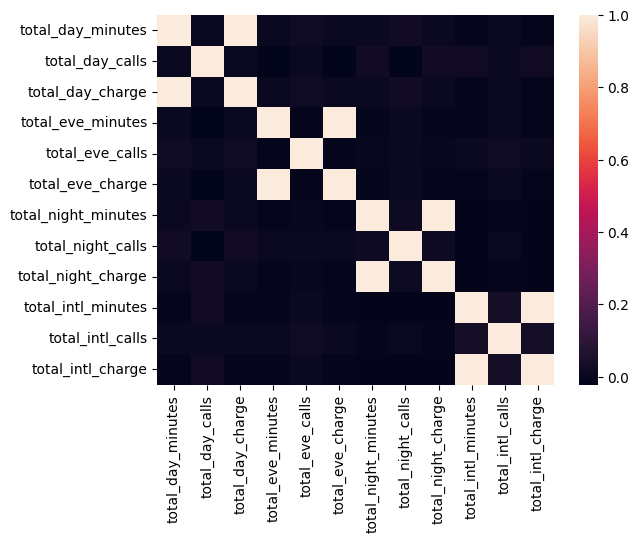

In [13]:
import seaborn as sns


sns.heatmap(mcc.corr())

####So all the minutes and charges are perfectly correlated, so i will keep any one only in the later part and all the day, night and eve will be combined into single part.

#Converting columns

####As the international_plan and voice_mail_plan have binary choices, let's convert it to 0s and 1s

In [14]:
df['international_plan']=df['international_plan'].apply(lambda x: 1 if x == 'yes' else 0)
df['voice_mail_plan']=df['voice_mail_plan'].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#Now we can prepare for modeling

In [16]:
x = df.drop(columns=['churn'])
y = df['churn']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

####One Hot Encoding the State column

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
# instantiating ohe object
ohe = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

# fitting ohe on small train data
ohe.fit(x_train[['state']])

# accessing the column names of the states
col_names = ohe.categories_[0]

# making a df with encoded states
state_encoded = pd.DataFrame(ohe.transform(x_train[["state"]]),
                               index = x_train.index,
                               columns = col_names)

# Combining the 2 dfs and droping state
x_train = pd.concat([x_train.drop("state", axis = 1), state_encoded], axis = 1)

#Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, confusion_matrix

In [21]:
def scale_balance_model(X_train, y_train, model, scaler = StandardScaler(), balance = SMOTE(random_state = 42)):
    # creating kfolds cross validation object
    kf = KFold(n_splits = 5, shuffle=True, random_state = 42)

    # creating list to add recall scores
    validation_recall = []

    for train_ind, val_ind in kf.split(X_train, y_train):  #split will give indices of train and test dataset
        X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
        X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]

        # instantiate and fit/transform scaler
        scaler = scaler
        X_t_sc = scaler.fit_transform(X_t)  #it will calculate mean and std dev and then transform
        X_val_sc = scaler.transform(X_val)  #it will transform on the basis of already fitted values

        # instantiate and fit balancing object:
        balance = balance
        X_t_resampled, y_t_resampled = balance.fit_resample(X_t_sc, y_t) #it will fit and then do sampling by smote

        # fit model to X_t_resampled:
        model.fit(X_t_resampled, y_t_resampled) #here decision tree classifier will work as it will be used for model object

        # append recall score to validation recall list:
        validation_recall.append(recall_score(y_val, model.predict(X_val_sc)))

    print(f"Validation recall scores: {validation_recall}")
    print(f"Mean validation recall score:  {np.mean(validation_recall)}")
    print(confusion_matrix(y_val, model.predict(X_val_sc)))

In [22]:
model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
scale_balance_model(x_train, y_train, model)

Validation recall scores: [0.8076923076923077, 0.7397260273972602, 0.7159090909090909, 0.782051282051282, 0.7846153846153846]
Mean validation recall score:  0.7659988185330651
[[440  28]
 [ 14  51]]


Our first recall score for our first model is 0.766 - let's visualise the feature importance of this model to see how this model may have been greedy to certain information gain.

From the confusion matrix here we can see our model predicts 14 false negatives. This is the number we will reduce in our modelling. Ideally, we would reduce both of these (FN and FP) as much as possible.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

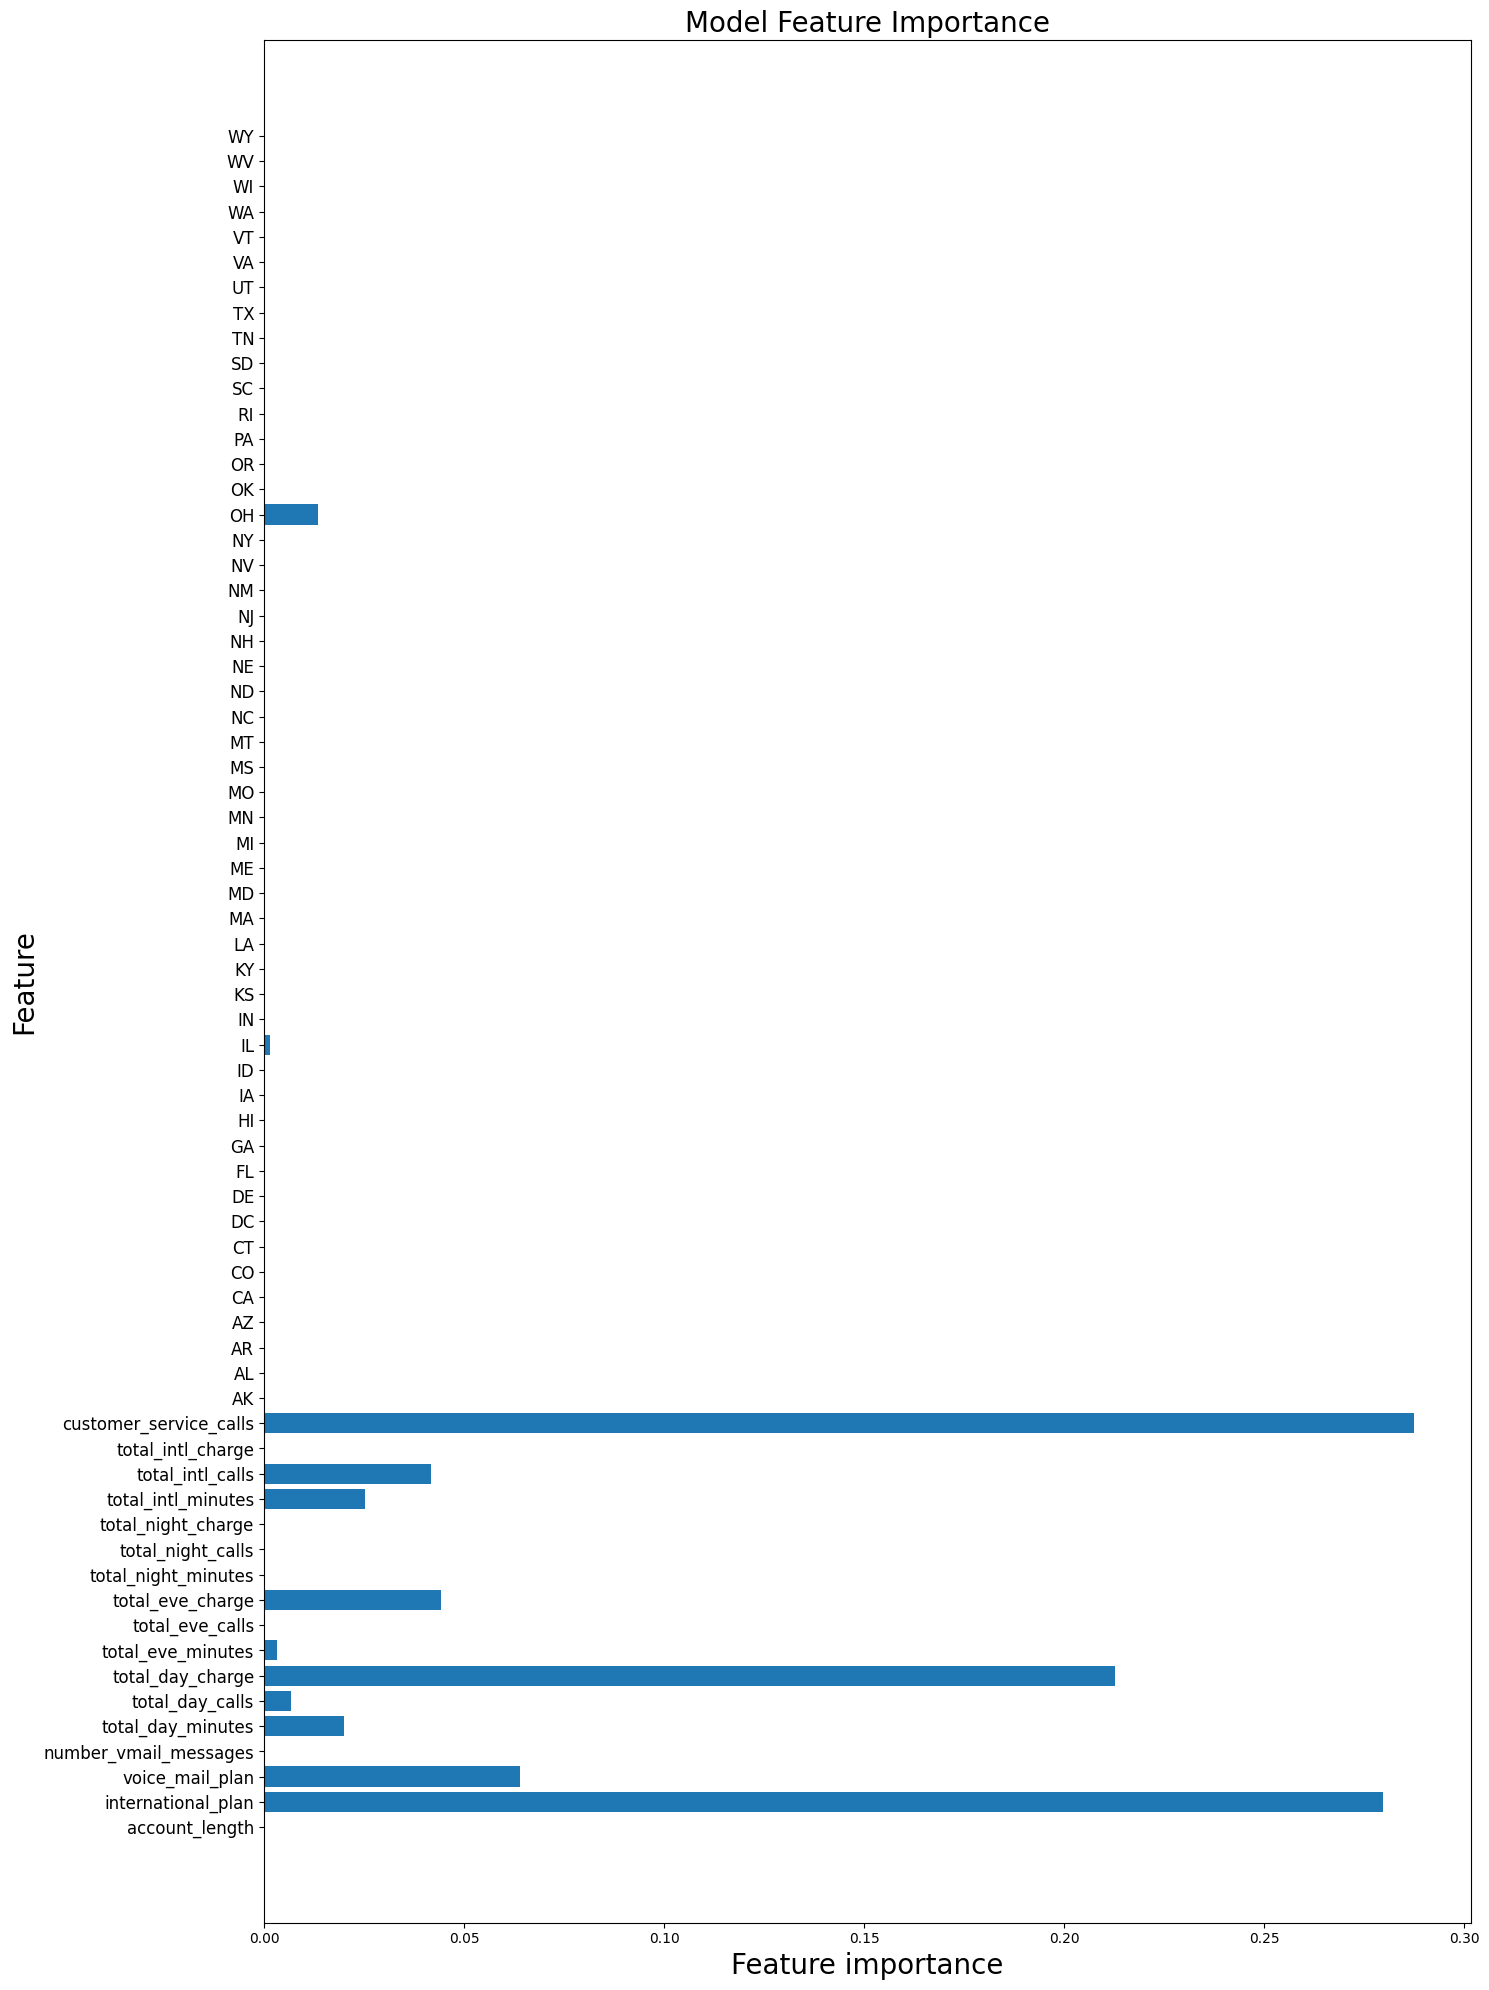

In [24]:
n_features = x_train.shape[1]
plt.figure(figsize=(15, 20))
plt.barh(range(n_features), model.feature_importances_);
plt.yticks(np.arange(n_features), x_train.columns.values, fontsize = 12)
plt.xlabel('Feature importance', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.title('Model Feature Importance', fontsize = 20)
plt.tight_layout()
plt.savefig('./model_feat_import.png')

We can see from this feature importance graph that there are three features that the model is weighing more heavily:

1. international_plan

2. total_day_charge

3. customer_service_calls

###Checking the correlation of all the features with churn to see if the model has correctly weighed the these three features.

In [25]:
# correlations with churn
df.corr().churn.sort_values(ascending = False)

<ipython-input-25-69517ad7918b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().churn.sort_values(ascending = False)


churn                     1.000000
international_plan        0.259852
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

##Performing more EDA on these features:

##1. International plan

In [26]:
int_plan_churn = pd.DataFrame(df.groupby(['international_plan'])['churn'].mean())
int_plan_churn

,churn
international_plan,
0,0.114950
1,0.424149


<ipython-input-27-a21129ed7937>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No International Plan', 'Has International Plan'])


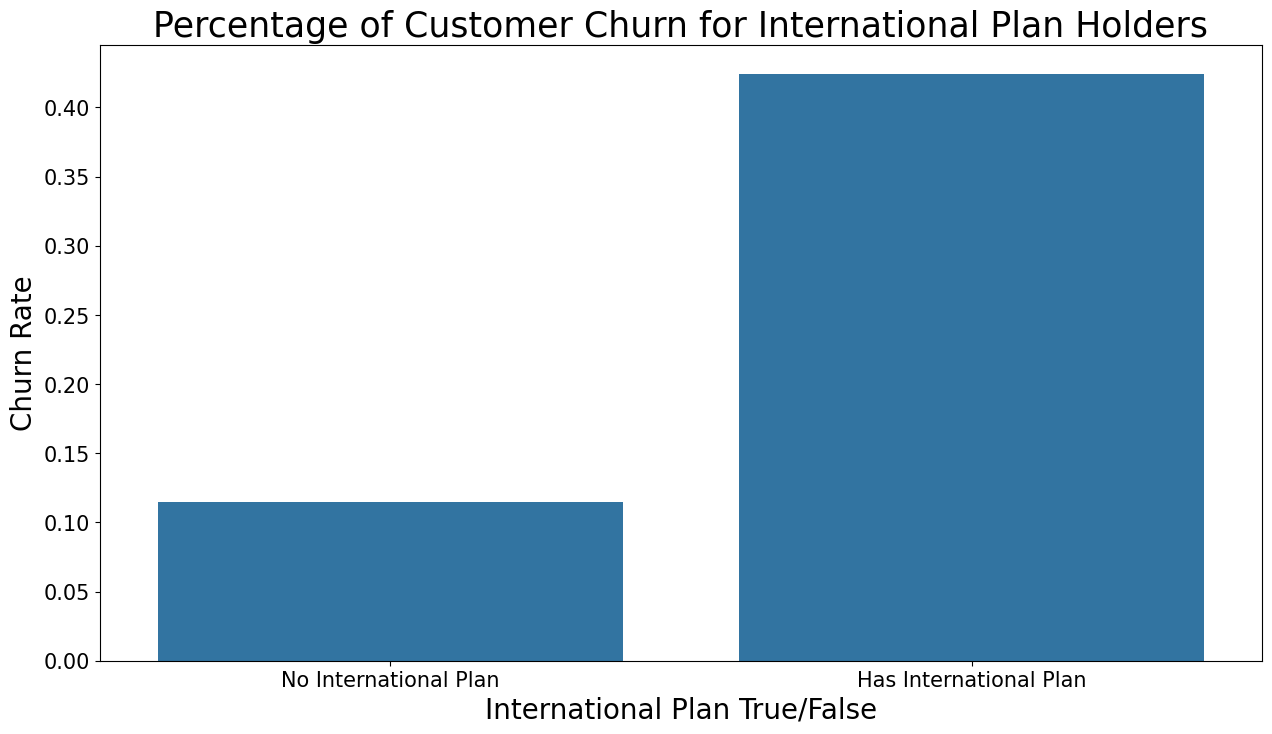

In [27]:
# plot
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1], y = 'churn', data = int_plan_churn, ax = ax)
plt.title('Percentage of Customer Churn for International Plan Holders', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('International Plan True/False', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'])
plt.savefig('./int_plan_churn.png')

###42% People with international plan churned out, therefore international plan is a deterministic factor of churn.

##2. Customer Service Calls

In [28]:
csc = pd.DataFrame(df.groupby(['customer_service_calls'])['churn'].mean())
csc

,churn
customer_service_calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


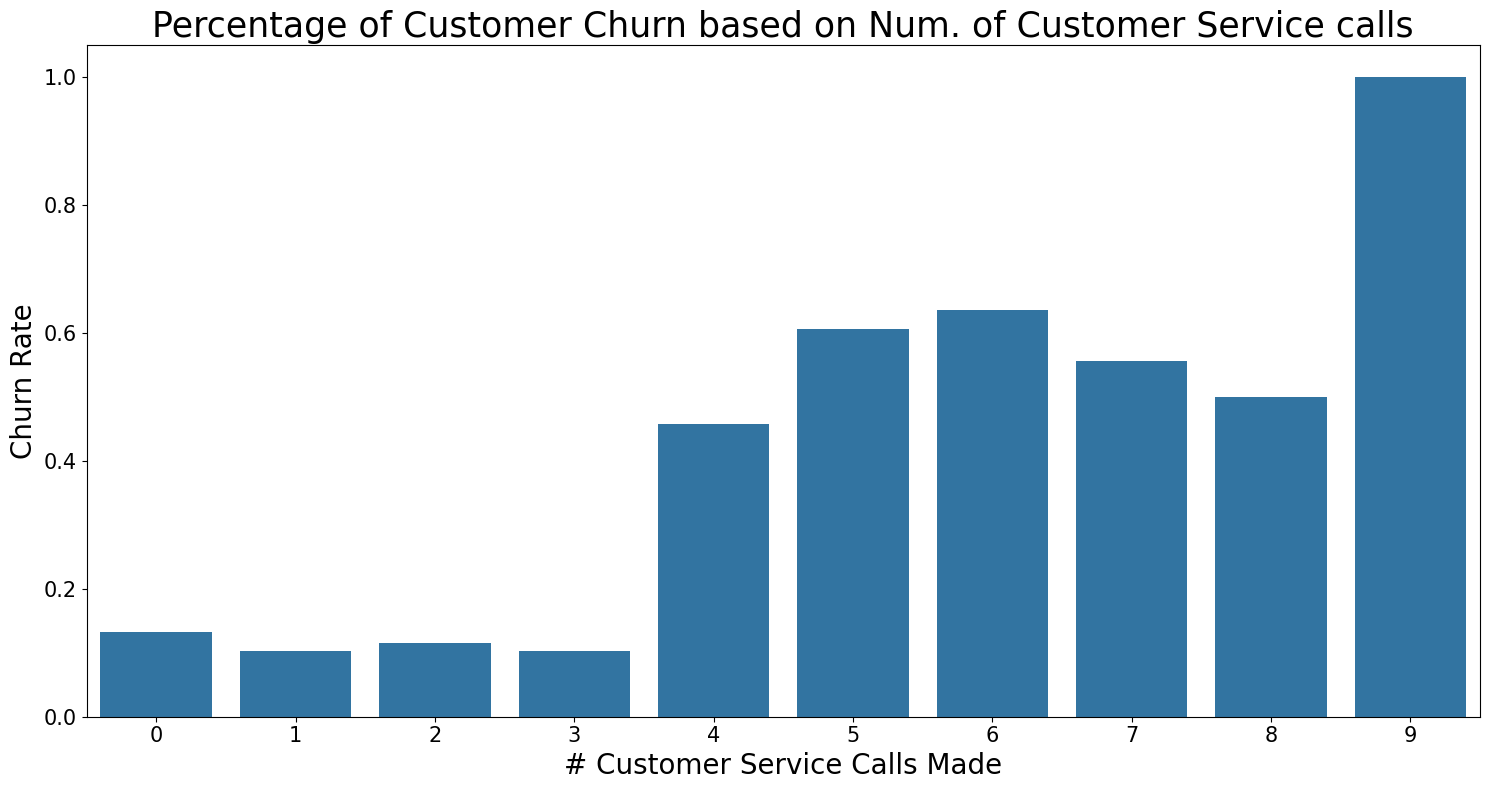

In [29]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y = 'churn', data = csc, ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('# Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
plt.savefig('./cust_serv_call_churn.png')

###There appears to be a huge spike in the rate of churn for customers who make 4 or more calls to customer service. Customers who make this many calls to customer service have a churn rate over 40%.

##3. Total Day Charge

<ipython-input-30-d612cce2f7bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_day_charge, ax = ax)


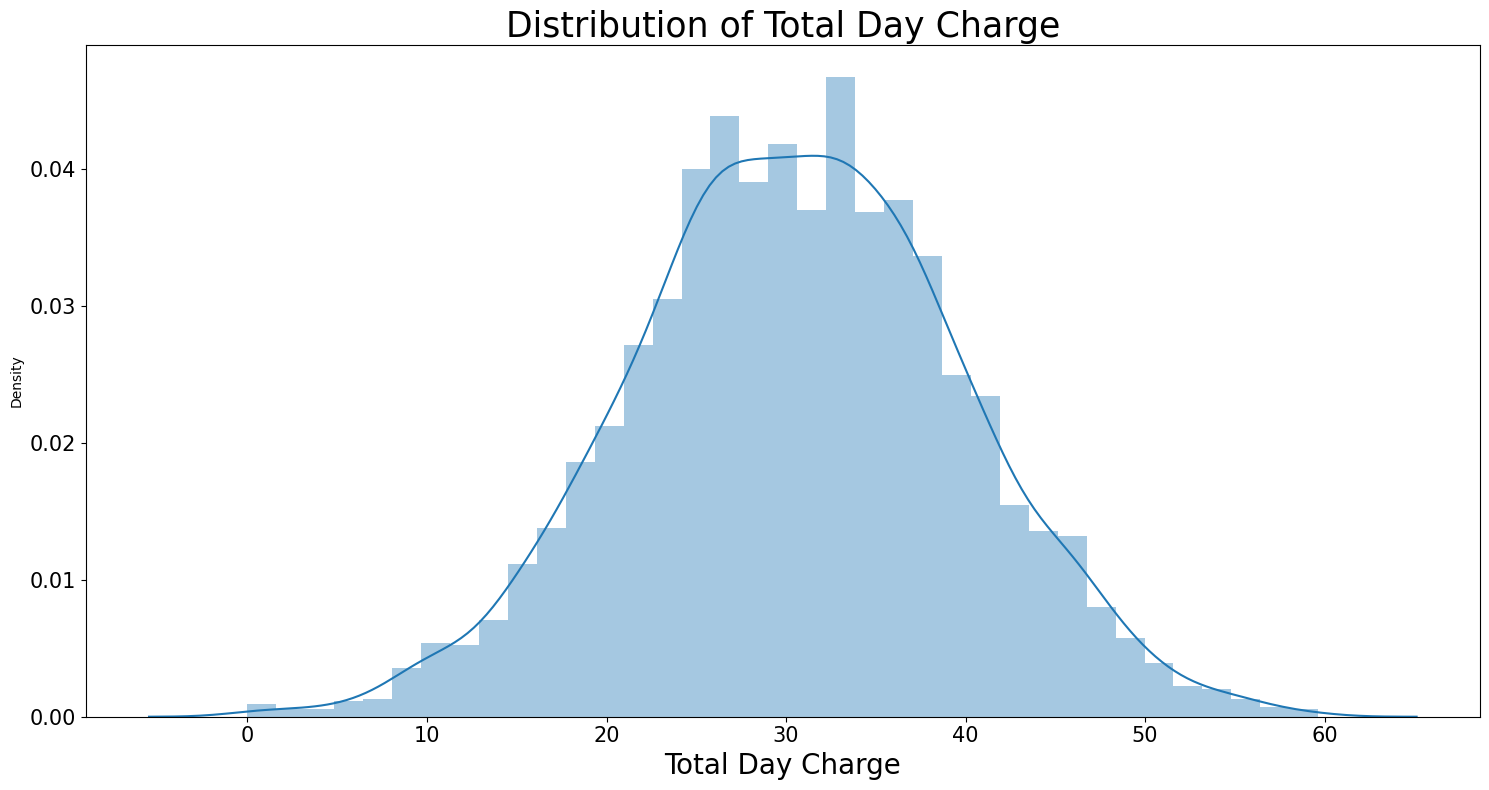

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Charge', fontsize = 25)
sns.distplot(df.total_day_charge, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Charge', fontsize = 20)
plt.tight_layout()
plt.savefig('./tot_day_charge_dist.png')

###This is almost a perfect normal distribution and so we don't detect any unusual activity or outliers for total day charge.

In [31]:
tdc = pd.DataFrame(df.groupby(['total_day_charge'])['churn'].mean())
tdc

,churn
total_day_charge,
0.00,0.5
0.44,0.0
1.33,0.0
1.34,0.0
2.13,0.0
...,...
57.04,1.0
57.36,1.0
58.70,1.0


<Axes: xlabel='churn', ylabel='total_day_charge'>

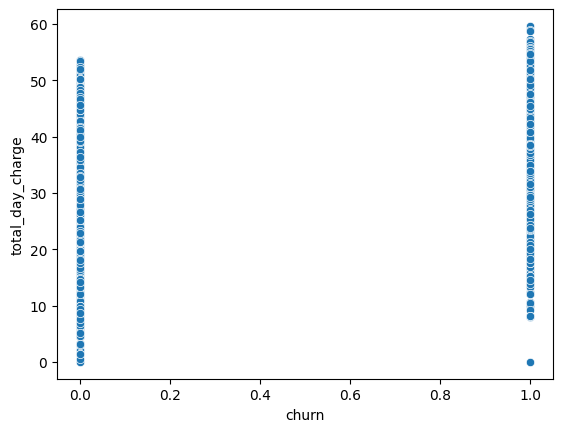

In [32]:
sns.scatterplot(x=df['churn'], y=df['total_day_charge'])

###We can see from this plot here that customers with total day charges of over roughly $55 have a 100% rate of churn.

In [33]:
tdc['churn_rate'] = tdc['churn'] * 100
tdc.drop('churn', axis = 1).iloc[-20:]

,churn_rate
total_day_charge,
53.65,0.0
54.03,100.0
54.59,100.0
54.62,100.0
54.67,100.0
54.79,100.0
54.81,100.0
54.83,100.0
55.20,100.0


###We see more specifically that all users who had a total day charge of $54.03 or more left the company.

##4. States:

In [34]:
df.groupby('state')['churn'].mean().sort_values(ascending=False)

state
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
NM    0.096774
ND    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64

###We can see there are three states that have particularly high churn that are California, New Jersey and Texas with a minimum churn in Hawaii of 5.7%

#Trying out model iterations

###After running our First Simple Model, we would like to maximise our recall score. The classifiers that we will be comparing are:

DecisionTreeClassifier()

KNeighborsClassifier()

RandomForestClassifier()

LogisticRegression()

GradientBoostingClassifier()

###To help us make the decision of which model to pursue next, we create a function that will run multiple classifiers with their default parameters and produce the train and test recall scores (to assess under/overfitting)

In [35]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [36]:
def compare_models(X_train, y_train):
    # create kfolds object
    kf = KFold(n_splits = 5, shuffle=True, random_state = 42)

    for train_ind, val_ind in kf.split(X_train, y_train):

        performance = pd.DataFrame(columns=['Train_Recall','Test_Recall','Test_Specificity'])
        mu_performance = pd.DataFrame(columns=['Train_Recall','Test_Recall','Test_Specificity'])

        recall = make_scorer(recall_score)

        X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
        X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]

        # instantiate and fit/transform scaler
        ss = StandardScaler()

        X_t_sc = ss.fit_transform(X_t)
        X_val_sc = ss.transform(X_val)

        # instantiate and fit SMOTE:
        smote = SMOTE(random_state = 42)
        X_t_sc_bal, y_t_bal = smote.fit_resample(X_t_sc, y_t)

        classifiers = [DecisionTreeClassifier(), KNeighborsClassifier(),
                   RandomForestClassifier(n_estimators = 10), LogisticRegression(),
                   GradientBoostingClassifier()]

        for clf in classifiers:
            train_cv = cross_val_score(X=X_t_sc_bal, y=y_t_bal,
                                       estimator=clf, scoring=recall,cv=10) #cv is no. of folds like in KFold we do, estimator is used to fit data

            # Predict
            y_pred = clf.fit(X_t_sc_bal, y_t_bal).predict(X_val_sc)

            conf_matrix = confusion_matrix(y_val,y_pred)

            # Store results
            performance.loc[clf.__class__.__name__+'_default',
                            ['Train_Recall','Test_Recall','Test_Specificity']] = [
                train_cv.mean(), #Train Recall = mean of all scores, run for an estimator cv no. of times
                recall_score(y_val,y_pred), #Test Recall = TP/TP+FN
                conf_matrix[0,0]/conf_matrix[0,:].sum() #Test Specificity = TN/TN+FP
            ]
        mu_performance = pd.concat([mu_performance,performance])
        print(mu_performance, '\n')

In [38]:
compare_models(x_train, y_train)

                                   Train_Recall Test_Recall Test_Specificity
DecisionTreeClassifier_default         0.936561    0.769231         0.910088
KNeighborsClassifier_default           0.985243         0.5         0.776316
RandomForestClassifier_default         0.913595    0.628205         0.951754
LogisticRegression_default              0.80747    0.717949         0.758772
GradientBoostingClassifier_default     0.930574    0.794872         0.967105 

                                   Train_Recall Test_Recall Test_Specificity
DecisionTreeClassifier_default         0.933054    0.684932         0.906522
KNeighborsClassifier_default           0.987381    0.520548         0.693478
RandomForestClassifier_default         0.899577    0.561644         0.928261
LogisticRegression_default             0.810244    0.657534         0.765217
GradientBoostingClassifier_default     0.934105    0.780822         0.941304 

                                   Train_Recall Test_Recall Test_Specifi

###So by looking above results of test recall and test specificity we can conclude that Gradient Boosting Classifier works better than others here on default parameters.

#Tuning hyperparameters:

###Model 2:

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
gbc2 = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.2, random_state = 42)
scale_balance_model(x_train, y_train, gbc2, MinMaxScaler())

Validation recall scores: [0.782051282051282, 0.7397260273972602, 0.6931818181818182, 0.6923076923076923, 0.7230769230769231]
Mean validation recall score:  0.7260687486029951
[[455  13]
 [ 18  47]]


###Model 3:

First Model had 0.766 recall score and here we have 0.726, so it has decreased now

In [41]:
from sklearn.model_selection import GridSearchCV

In [43]:
# creating parameter grid
param_grid = {
    "loss":["exponential", "log_loss"], #log loss is same as deviance
    "learning_rate": [0.01, 0.05],
    "min_samples_split": [1.0, 2, 5]
    }

# creating gradient boost object for grid searching
gbc3 = GradientBoostingClassifier(random_state = 42)

# creating search object
search = GridSearchCV(estimator = gbc3, param_grid = param_grid, n_jobs = -1, cv = 3, scoring='recall') #n_jobs = -1 means that all processors will be used

# Training search object
search.fit(x_train, y_train)

# Getting best estimator
print('Best parameters: \n\n',search.best_params_,'\n')

Best parameters: 

 {'learning_rate': 0.05, 'loss': 'log_loss', 'min_samples_split': 2} 



In [44]:
gbc3 = GradientBoostingClassifier(learning_rate = 0.05, loss = 'log_loss', min_samples_split = 2, random_state = 42)
scale_balance_model(x_train, y_train, gbc3, MinMaxScaler())

Validation recall scores: [0.8205128205128205, 0.7808219178082192, 0.75, 0.7435897435897436, 0.8]
Mean validation recall score:  0.7789848963821566
[[444  24]
 [ 13  52]]


###Model 4:

The recall score has significantly increased to 0.779 and False Negative also decreased. Let's try gridcv with smaller set of learning rates.

In [45]:
# creating parameter grid
param_grid = {
    "loss":["exponential", "log_loss"],
    "learning_rate": [0.01],
    "min_samples_split": [1.0, 2, 5]
    }

# creating gradient boost object for grid searching
gbc4 = GradientBoostingClassifier(random_state = 42)

# creating search object
search = GridSearchCV(estimator = gbc4, param_grid = param_grid, n_jobs = -1, cv = 3, scoring='recall')

# Training search object
search.fit(x_train, y_train)

# Getting best estimator
print('Best parameters: \n\n',search.best_params_,'\n')

Best parameters: 

 {'learning_rate': 0.01, 'loss': 'log_loss', 'min_samples_split': 2} 



In [47]:
gbc4 = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.01, min_samples_split = 2, random_state = 42)
scale_balance_model(x_train, y_train, gbc4, MinMaxScaler())

Validation recall scores: [0.8333333333333334, 0.8082191780821918, 0.75, 0.8461538461538461, 0.8]
Mean validation recall score:  0.8075412715138743
[[406  62]
 [ 13  52]]


### Model 5:

The recall score has significantly increased to 0.808 but False Negative are same. Let's try StandardScaler() to see if it affects the model.

In [52]:
gbc5 = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.01, min_samples_split = 2, random_state = 42)
scale_balance_model(x_train, y_train, gbc5, StandardScaler())

Validation recall scores: [0.8589743589743589, 0.8356164383561644, 0.7386363636363636, 0.8589743589743589, 0.8615384615384616]
Mean validation recall score:  0.8307479962959416
[[393  75]
 [  9  56]]


###Model 6:

The recall score has significantly increased to 0.831 and False Negative have reduced. Let's try max_depth and min_sample_leaf parameters as well with both the loss functions.

In [61]:
gbc6a = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.01, min_samples_leaf= 0.2, min_samples_split= 0.2, max_depth = 3, random_state = 42)
scale_balance_model(x_train, y_train, gbc6a, StandardScaler())

Validation recall scores: [0.8974358974358975, 0.8493150684931506, 0.8522727272727273, 0.8974358974358975, 0.8769230769230769]
Mean validation recall score:  0.8746765335121498
[[302 166]
 [  8  57]]


In [59]:
gbc6 = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.01, min_samples_leaf= 0.2, min_samples_split= 0.2, max_depth = 3, random_state = 42)
scale_balance_model(x_train, y_train, gbc6, StandardScaler())

Validation recall scores: [0.8974358974358975, 0.8493150684931506, 0.8522727272727273, 0.8974358974358975, 0.8769230769230769]
Mean validation recall score:  0.8746765335121498
[[302 166]
 [  8  57]]


Best recall score so farof 0.875 and while our true positives have increased here, we have once again reduced our false negatives.

#Final Test Model using Gradient Boosting

###One Hot Encode Test Data

In [65]:
# making a df with encoded states
test_state_encoded = pd.DataFrame(ohe.transform(x_test[['state']]),
                               index = x_test.index,
                               columns = col_names)

# combining encoded states with X_t and droping old 'state' column
x_test = pd.concat([x_test.drop("state", axis = 1), test_state_encoded], axis = 1)

###Testing model on test data

In [66]:
# creating and transforming using scaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(x_train)
X_test_ss = ss.transform(x_test)

# create balance object
smote = SMOTE(random_state = 42)

# fit balance object
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ss, y_train)

# create our final model object
final = GradientBoostingClassifier(loss = 'exponential', learning_rate = 0.01,
                                   min_samples_leaf= 0.2, min_samples_split= 0.2,
                                   max_depth = 3, random_state = 42)

final.fit(X_train_resampled, y_train_resampled)

print(f'Train: {recall_score(y_train, final.predict(X_train_ss))}')
print(f'Test:  {recall_score(y_test, final.predict(X_test_ss))}')
print(confusion_matrix(y_test, final.predict(X_test_ss)))

Train: 0.8743455497382199
Test:  0.8811881188118812
[[381 185]
 [ 12  89]]


##Result: Recall score is 0.881

#Conclusion and Scope of improvement

It was highlighted during the EDA of this project that there are many areas which the company could improve to help reduce high churn factors. Below are some possible suggestions of what could be further investigated:

1. Further investigation should be devoted to looking into the other characteristics of these customers to find out why there was a need to make this many calls to customer service and how the company could better assist these customers.

2. Given that over 42% of international plan holders churn, further investigation into retention efforts for these customers might be a worthwhile effort.

3. Investigate ways to incentivise customers with total day charges over $55 to stay with with the company by creating added value and perks. This investigation found that 100% of these customers churn.

4. Further investigation should be done to see what is going on in some high churn states to see what trends might be causing this.

Scope of improvement: XGBoost could be used as Gradient Boosting gave good result so XGBoost with the help of its Regularization techniques can do better job as its built on top of Gradient Boosting algorithm.